<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/multi_ticker_lstm_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Protocol Buffer Fix (for TensorFlow)
!pip install --upgrade protobuf
!pip install protobuf==3.20.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.2/316.2 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 6.30.2 which is incompatible.
google-cloud-firestore 2.20.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.2 which is incompatible.
tensorflow-metadata 1.17.0 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 6.30.2 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 wh

In [4]:
#Install TensorFlow (latest stable GPU-compatible version)
!pip install tensorflow

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

#Reinstall RAPIDS dependencies if needed (optional reset)
!pip install --upgrade --force-reinstall \
    dask==2024.11.2 \
    rapids-dask-dependency==24.12.0 \
    cudf-cu12==24.12.0 \
    cuml-cu12==24.12.0 \
    pylibraft-cu12==24.12.0 \
    pylibcudf-cu12==24.12.0 \
    numba==0.61.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [3]:
import torch
import cudf
import cuml
import dask
import pandas as pd
import numpy as np
import scipy
import lightgbm as lgb
import gymnasium as gym
import stable_baselines3

#=========================
#Version Checks
#=========================
print(" Library Versions")
print("--------------------")
print(" PyTorch:", torch.__version__)
print(" CUDA:", torch.version.cuda)
print(" cuDF:", cudf.__version__)
print(" cuML:", cuml.__version__)
print(" Dask:", dask.__version__)
print(" Pandas:", pd.__version__)
print(" NumPy:", np.__version__)
print(" SciPy:", scipy.__version__)
print(" LightGBM:", lgb.__version__)
print(" Gymnasium:", gym.__version__)
print(" Stable Baselines3:", stable_baselines3.__version__)

#=========================
# GPU Check (Torch + NVIDIA)
#=========================
print("\n GPU Availability")
print("--------------------")
print(" PyTorch GPU Available:", torch.cuda.is_available())
print(" GPU Count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print(" GPU Name:", torch.cuda.get_device_name(0))

ImportError: Numba needs NumPy 1.24 or greater. Got NumPy 1.23.

In [1]:
#  Clean install of TensorFlow compatible with Colab's GPU (CUDA 11.8 + cuDNN 8.x)
!pip uninstall -y tensorflow keras
!pip install tensorflow==2.12.0

#Restart runtime after this!
!pip install numpy==1.24.4 --force-reinstall

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Successfully uninstalled keras-2.12.0
  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (586.0 MB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 104.1 MB/s eta 0:00:00
^C


In [4]:
#  Core & System Utilities
import os
import gc
import sys
import time
import json
import pickle
import random
from datetime import datetime
from collections import defaultdict, deque

#  Data Science Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numba

#  Financial Data
import yfinance as yf

#  Machine Learning & Preprocessing
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix
)

#  Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import Input, backend as K
from tensorflow.keras import mixed_precision

#  Visualization & Display
import IPython.display as display

#  RAPIDS Libraries (for GPU-accelerated ML, optional)
import cupy as cp

#  Reinforcement Learning (Stable Baselines3)
import stable_baselines3
from stable_baselines3 import A2C, DDPG, DQN, PPO, SAC, TD3
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

#  Gym & Trading Environments
import gym
import gymnasium as gym
import gym_anytrading
from gym.spaces import Box
from gymnasium.spaces import Box as GymBox, Discrete
from gymnasium.wrappers import TimeLimit

#  CUDA (Optional Paths - for manual GPU configuration)
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

#  GPU Check (Colab only)
!nvidia-smi


ImportError: Numba needs NumPy 1.24 or greater. Got NumPy 1.23.

In [2]:
# Required for TensorFlow compatibility (GPU + cuDNN)
!pip uninstall -y tensorflow keras -q
!pip install tensorflow==2.12.0 -q

# Fix protobuf compatibility
!pip install protobuf==3.20.3 -q

# Essential packages
!pip install numpy==1.24.4 pandas joblib yfinance scikit-learn matplotlib -q


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.12.0 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you ha

In [11]:
import os
from google.colab import drive

if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')
else:
    print(" Google Drive is already mounted.")



 Google Drive is already mounted.


In [27]:
#  Imports
import os, gc, joblib, yfinance as yf
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import Input

#  Config
save_dir = '/content/drive/MyDrive/LSTM_Models'
os.makedirs(save_dir, exist_ok=True)

#  Toggle test mode
test_mode = False
TICKERS = ['AAPL'] if test_mode else [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL']

#  Feature Engineering Function
def compute_technical_indicators(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))
    df['MACD'] = df['Close'].ewm(span=12, adjust=False).mean() - df['Close'].ewm(span=26, adjust=False).mean()
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['ATR'] = df['High'].rolling(window=14).max() - df['Low'].rolling(window=14).min()
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())
    df.dropna(inplace=True)
    return df

#  LSTM Training Function
def train_lstm_for_stock(ticker, sequence_length=60, epochs=10, batch_size=32):
    print(f"\nTraining LSTM for {ticker}")

    model_path = f"{save_dir}/lstm_{ticker}_model.h5"
    if os.path.exists(model_path):
        print(f"Skipping {ticker}, model already exists.")
        return

    df = yf.download(ticker, period="720d", interval="1h", progress=False)
    if df.empty:
        print(f"No data for {ticker}, skipping.")
        return

    df.reset_index(inplace=True)
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df.reset_index(drop=True, inplace=True)

    try:
        df = compute_technical_indicators(df)
        features = ['Close', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'Signal_Line', 'ATR', 'OBV', 'CCI']
        df_lstm = df[features].copy()
        #  Fix feature name mismatch warning
        if hasattr(scaler, "feature_names_in_"):
            scaled_data = scaler.transform(pd.DataFrame(df_lstm, columns=scaler.feature_names_in_))
        else:
            scaled_data = scaler.transform(df_lstm)

        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(df_lstm)
        joblib.dump(scaler, f"{save_dir}/{ticker}_scaler.pkl")

        X, y = [], []
        for i in range(sequence_length, len(scaled_data)):
            X.append(scaled_data[i-sequence_length:i])
            y.append(scaled_data[i, 0])
        X, y = np.array(X), np.array(y)

        split = int(len(X) * 0.8)
        X_train, X_test = X[:split], X[split:]
        y_train, y_test = y[:split], y[split:]

        model = Sequential([
            Input(shape=(X_train.shape[1], X_train.shape[2])),
            LSTM(50, return_sequences=True, activation='tanh', recurrent_activation='sigmoid', use_bias=True, unroll=False),
            LSTM(50, return_sequences=True, activation='tanh', recurrent_activation='sigmoid', use_bias=True, unroll=False),
            LSTM(50, activation='tanh', recurrent_activation='sigmoid', use_bias=True, unroll=False),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')

        local_model_path = f"/content/lstm_{ticker}_model.h5"
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        model.save(local_model_path)
        !cp "{local_model_path}" "{model_path}"

        print(f" Saved model to: {model_path}")

        with open(f"{save_dir}/trained_tickers.txt", "a") as f:
            f.write(f"{datetime.now()}: Trained {ticker}\n")

    except Exception as e:
        print(f"Error with {ticker}: {e}")

    finally:
        tf.keras.backend.clear_session()
        gc.collect()

#  Auto-resume: get remaining tickers
trained_files = [f.split('_')[1] for f in os.listdir(save_dir) if f.endswith('_model.h5')]
remaining = [t for t in TICKERS if t not in trained_files]
print(f"{len(remaining)} tickers remaining to train\n")

#  Run training loop
for ticker in remaining:
    train_lstm_for_stock(ticker)
    gc.collect()


0 tickers remaining to train



In [14]:
gc.collect

<function gc.collect(generation=2)>

In [29]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np
import pandas as pd
import yfinance as yf

#  LSTM Evaluation Function (with scaler warning fix)
def evaluate_lstm_model(ticker, model_path, scaler_path, sequence_length=60, initial_cash=100000, return_history=False):
    # Load model and scaler
    model = load_model(model_path)
    scaler = joblib.load(scaler_path)

    # Download and process stock data
    df = yf.download(ticker, period="360d", interval="1h", progress=False)
    df = compute_technical_indicators(df)
    features = ['Close', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'Signal_Line', 'ATR', 'OBV', 'CCI']
    df_lstm = df[features].copy()

    #  Fix UserWarning from MinMaxScaler
    if hasattr(scaler, "feature_names_in_"):
        df_lstm = pd.DataFrame(df_lstm, columns=scaler.feature_names_in_)
    scaled_data = scaler.transform(df_lstm)

    # Create sequences
    X_test = []
    real_prices = []
    for i in range(sequence_length, len(scaled_data)):
        X_test.append(scaled_data[i-sequence_length:i])
        real_prices.append(df_lstm.iloc[i]['Close'])

    X_test = np.array(X_test)
    real_prices = np.array(real_prices)

    # Predict
    predicted = model.predict(X_test).flatten()
    predicted_prices = scaler.inverse_transform(
        np.hstack([predicted.reshape(-1, 1), np.zeros((len(predicted), len(features)-1))])
    )[:, 0]

    # Simulate portfolio
    portfolio_lstm = [initial_cash]
    portfolio_hold = [initial_cash]
    shares = initial_cash / real_prices[0]

    for i in range(1, len(predicted_prices)):
        action = 1 if predicted_prices[i] > real_prices[i-1] else 0
        cash = portfolio_lstm[-1]
        if action:
            cash = shares * real_prices[i]
        portfolio_lstm.append(cash)
        portfolio_hold.append(shares * real_prices[i])

    # Results
    results = {
        "Final Portfolio (LSTM)": portfolio_lstm[-1],
        "Final Portfolio (Hold)": portfolio_hold[-1],
        "Return % (LSTM)": (portfolio_lstm[-1] - initial_cash) / initial_cash * 100,
        "Return % (Hold)": (portfolio_hold[-1] - initial_cash) / initial_cash * 100
    }

    if return_history:
        results["Portfolio_LSTM_History"] = portfolio_lstm
        results["Portfolio_Hold_History"] = portfolio_hold
        results["Dates"] = df.index[-len(portfolio_lstm):].to_list()

    return results


In [35]:
#  Collect evaluation results
results = []
for ticker in TICKERS:
    try:
        model_path = f"/content/drive/MyDrive/LSTM_Models/lstm_{ticker}_model.h5"
        scaler_path = f"/content/drive/MyDrive/LSTM_Models/{ticker}_scaler.pkl"
        if not os.path.exists(model_path) or not os.path.exists(scaler_path):
            continue
        result = evaluate_lstm_model(ticker, model_path, scaler_path)
        result["Symbol"] = ticker
        results.append(result)
    except Exception as e:
        print(f"Skipping {ticker}: {e}")


#  Create DataFrame from results
results_df = pd.DataFrame(results)

top5 = results_df.sort_values(by="Return % (LSTM)", ascending=False).head(5)
bottom5 = results_df.sort_values(by="Return % (LSTM)", ascending=True).head(5)
display(top5)
display(bottom5)



75/75 [==============================] - 3s 20ms/step


,Final Portfolio (LSTM),Final Portfolio (Hold),Return % (LSTM),Return % (Hold),Symbol
0,100000,NaN,0.0,NaN,AAPL
27,100000,NaN,0.0,NaN,ABT
29,100000,NaN,0.0,NaN,WMT
30,100000,NaN,0.0,NaN,MCD
31,100000,NaN,0.0,NaN,ADBE


,Final Portfolio (LSTM),Final Portfolio (Hold),Return % (LSTM),Return % (Hold),Symbol
0,100000,NaN,0.0,NaN,AAPL
28,100000,NaN,0.0,NaN,ACN
29,100000,NaN,0.0,NaN,WMT
30,100000,NaN,0.0,NaN,MCD
31,100000,NaN,0.0,NaN,ADBE


In [34]:
import gc

gc.collect

<function gc.collect(generation=2)>

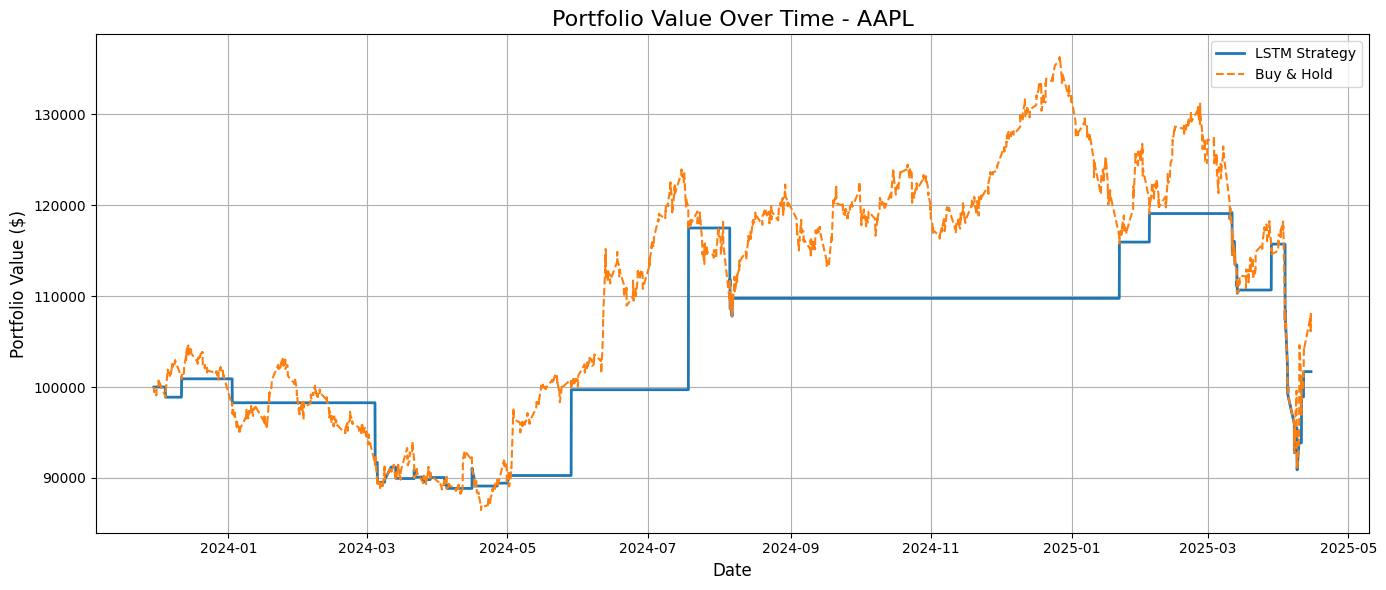

In [22]:
#  Import
from tensorflow.keras.models import load_model

#  Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(result["Dates"], result["Portfolio_LSTM_History"], label="LSTM Strategy", linewidth=2)
plt.plot(result["Dates"], result["Portfolio_Hold_History"], label="Buy & Hold", linestyle='--')
plt.title("Portfolio Value Over Time - AAPL", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Portfolio Value ($)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
